In [35]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [54]:
delta_r=0.5

r=delta_r

def ObliczDlugosc(choosen_point,points):
    dlugosc=[]
    for point in points:
        vector_from_choosen=choosen_point-point
        dlugosc.append(np.linalg.norm(vector_from_choosen))
        
    return dlugosc


def RozkladRadialny(points,density=1,delta_r=delta_r):
    rho_list_all=[]
    for choosen_point in tqdm(points): 
        
        dlugosc=ObliczDlugosc(choosen_point,points)
        
            
        rho_list=[]
        r_list=[]
        r=delta_r

        while r<40:
            n=0
            for i in dlugosc:
                if i > r and i< r +delta_r:
                    n+=1
            rho_list.append((1/density)*n/(2*np.pi*r*delta_r))

            r_list.append(r)
            r+=delta_r
        rho_list_all.append([rho_list])
    rho_list_all=np.sum(rho_list_all,axis=0)/len(points)

    return rho_list_all[0],r_list

In [55]:
polozenia=np.array([[0,0],[1,0],[2,0],[3,0],[4,0]])
print(polozenia)
rho,r=RozkladRadialny(points=data)


# print(len(r))

  1%|▏         | 7/500 [00:00<00:07, 62.28it/s]

[[0 0]
 [1 0]
 [2 0]
 [3 0]
 [4 0]]


100%|██████████| 500/500 [00:07<00:00, 65.81it/s]


In [63]:
r=[20]
r[1]=1

IndexError: list assignment index out of range

In [71]:
rho=[]
r=[]
delt=[]
for i,delta in enumerate(np.linspace(0.1,0.7,num=20)):
    print(i)
    delta_r=delta
    a,b=RozkladRadialny(points=data,delta_r=delta_r)
    rho.append(a)
    r.append(b)
    delt.append(delta)

  0%|          | 1/1481 [00:00<03:26,  7.16it/s]

0


  0%|          | 2/1481 [00:00<02:11, 11.26it/s]

1


  0%|          | 2/1481 [00:00<01:51, 13.32it/s]

2


  0%|          | 2/1481 [00:00<01:34, 15.60it/s]

3


  0%|          | 2/1481 [00:00<01:31, 16.19it/s]

4


  0%|          | 2/1481 [00:00<01:16, 19.21it/s]

5


  0%|          | 2/1481 [00:00<01:20, 18.32it/s]

6


  0%|          | 3/1481 [00:00<01:06, 22.13it/s]

7


  0%|          | 3/1481 [00:00<01:05, 22.53it/s]

8


  0%|          | 3/1481 [00:00<01:01, 23.89it/s]

9


  0%|          | 3/1481 [00:00<00:53, 27.42it/s]

10


  0%|          | 3/1481 [00:00<00:50, 29.07it/s]

11


  0%|          | 3/1481 [00:00<00:52, 28.41it/s]

12


  0%|          | 3/1481 [00:00<01:01, 23.97it/s]

13


  0%|          | 4/1481 [00:00<00:45, 32.16it/s]

14


  0%|          | 4/1481 [00:00<00:46, 31.95it/s]

15


  0%|          | 4/1481 [00:00<00:45, 32.60it/s]

16


  0%|          | 4/1481 [00:00<00:41, 35.29it/s]

17


  0%|          | 4/1481 [00:00<00:42, 34.98it/s]

18


  0%|          | 4/1481 [00:00<00:44, 33.29it/s]

19


100%|██████████| 1481/1481 [00:44<00:00, 33.25it/s]


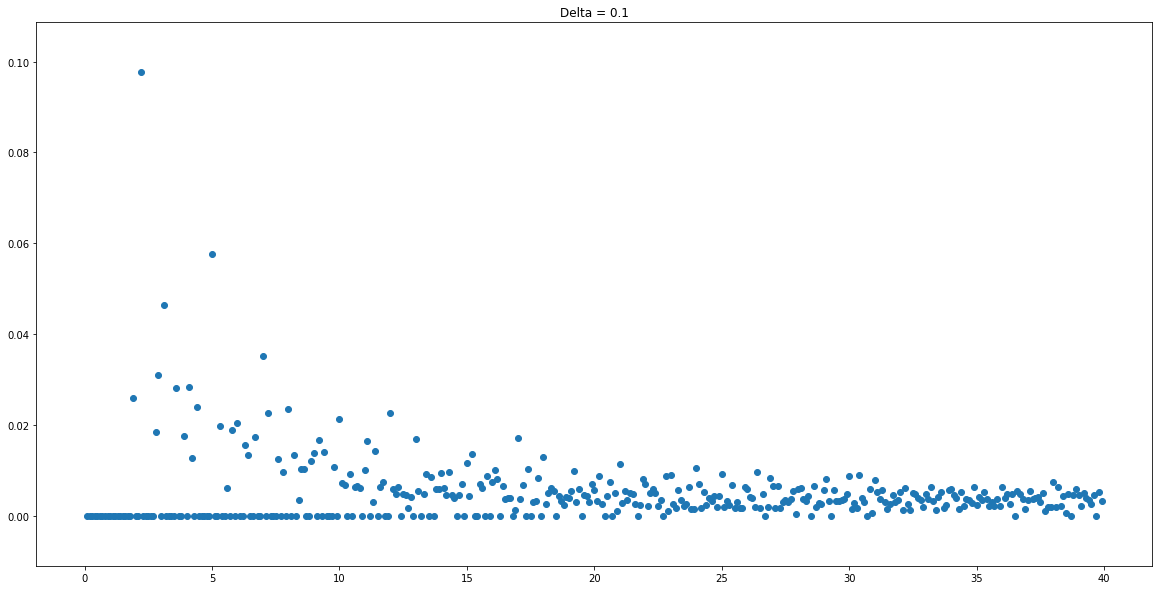

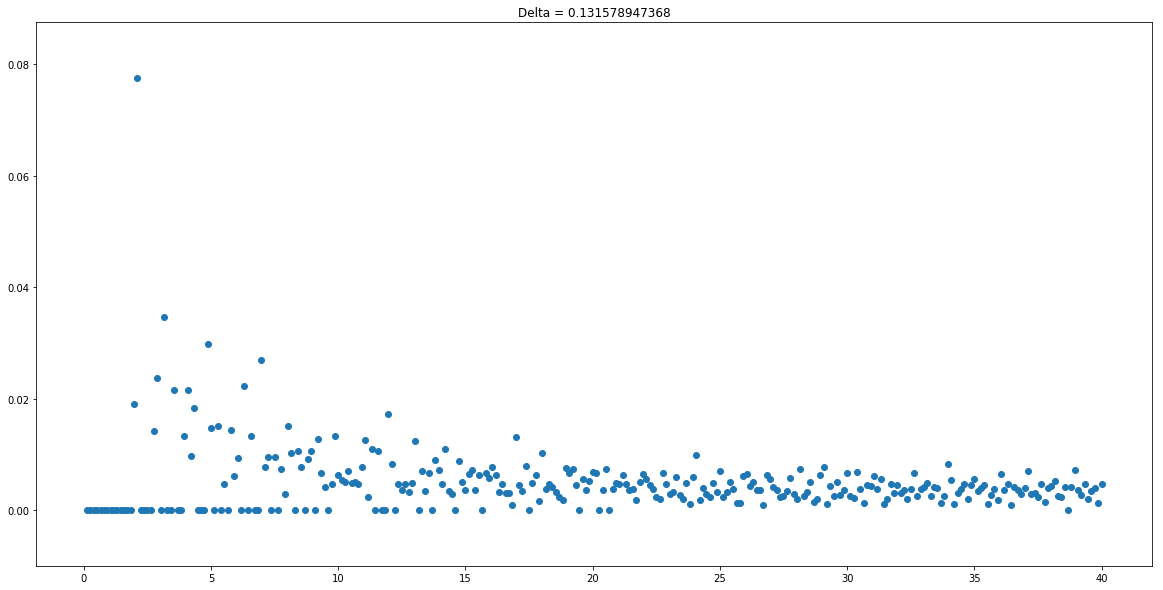

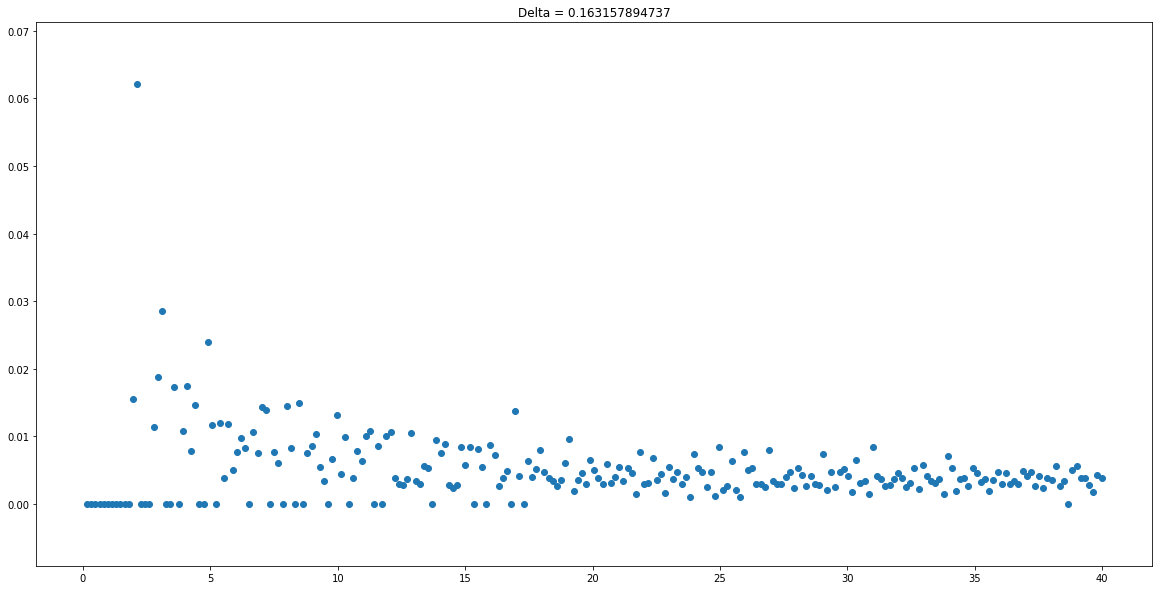

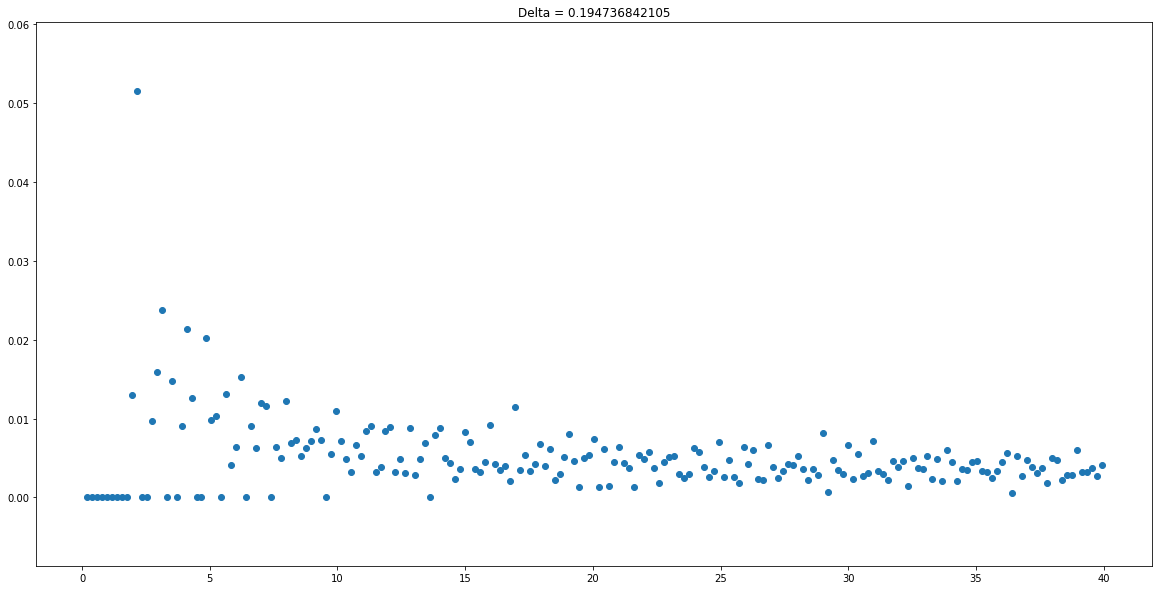

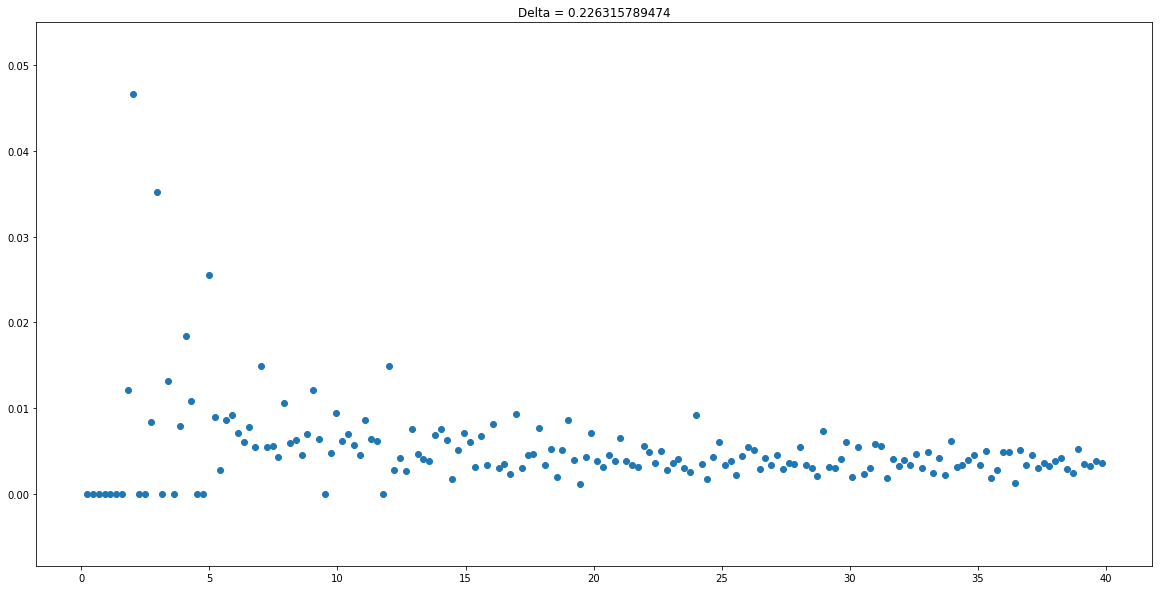

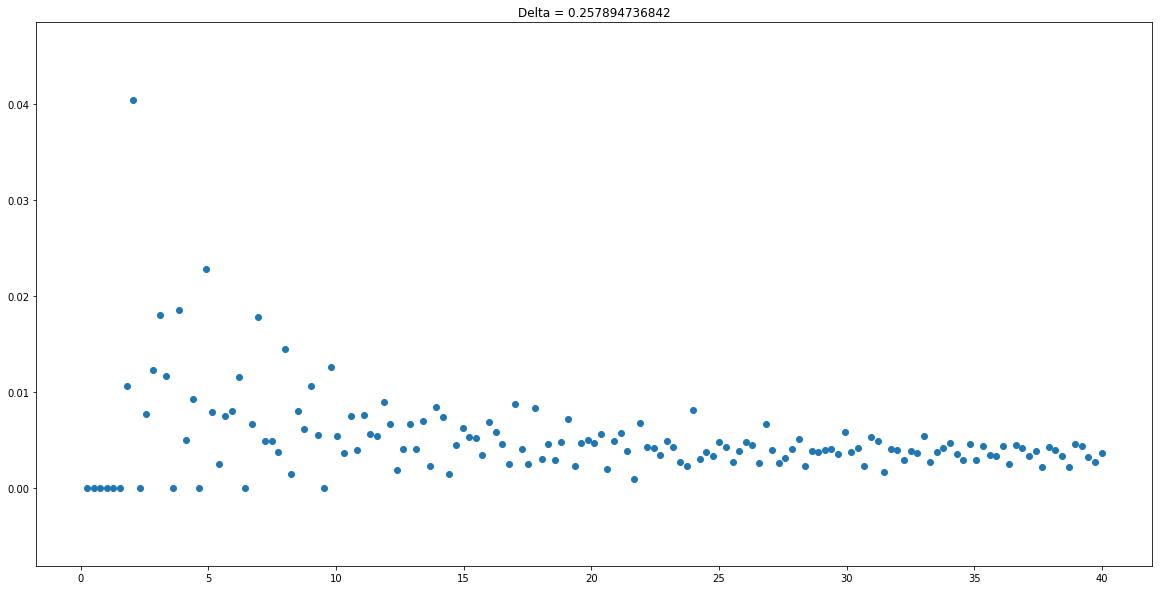

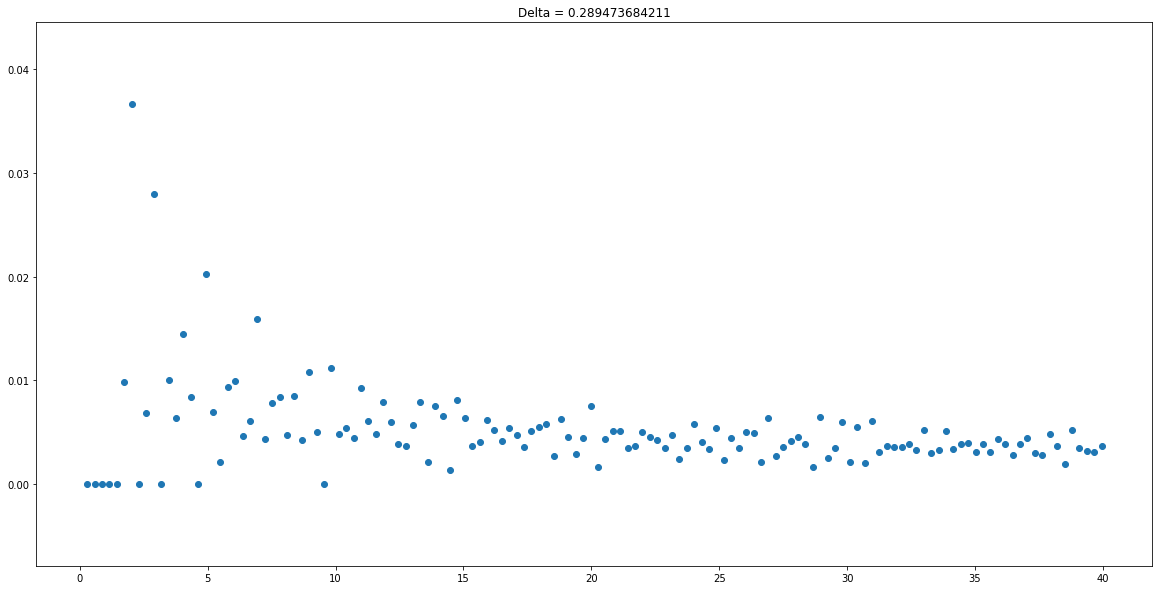

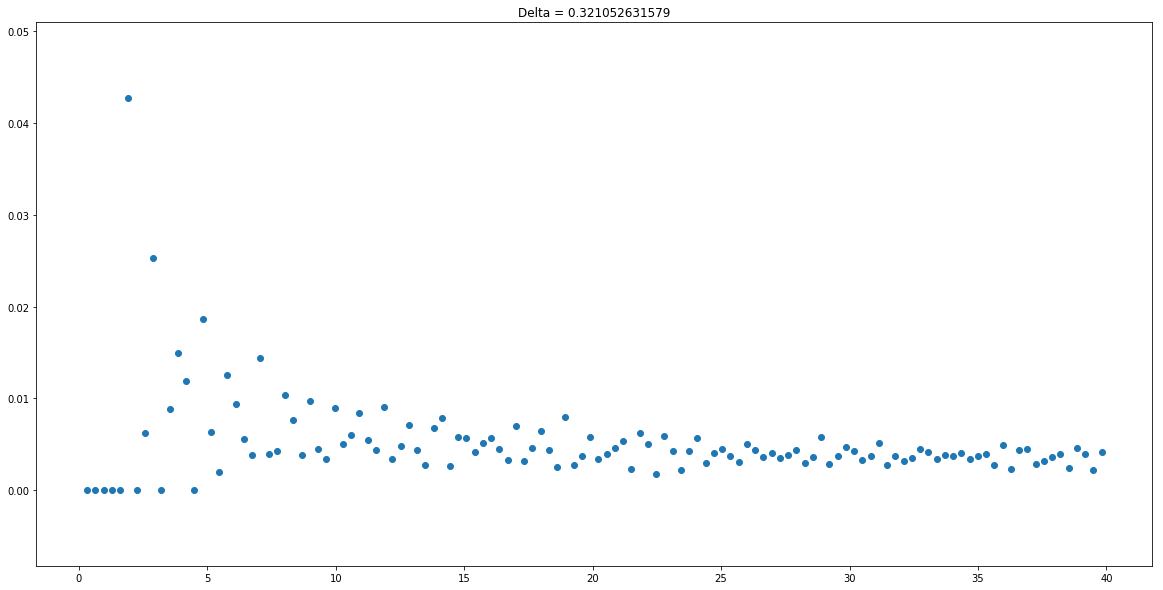

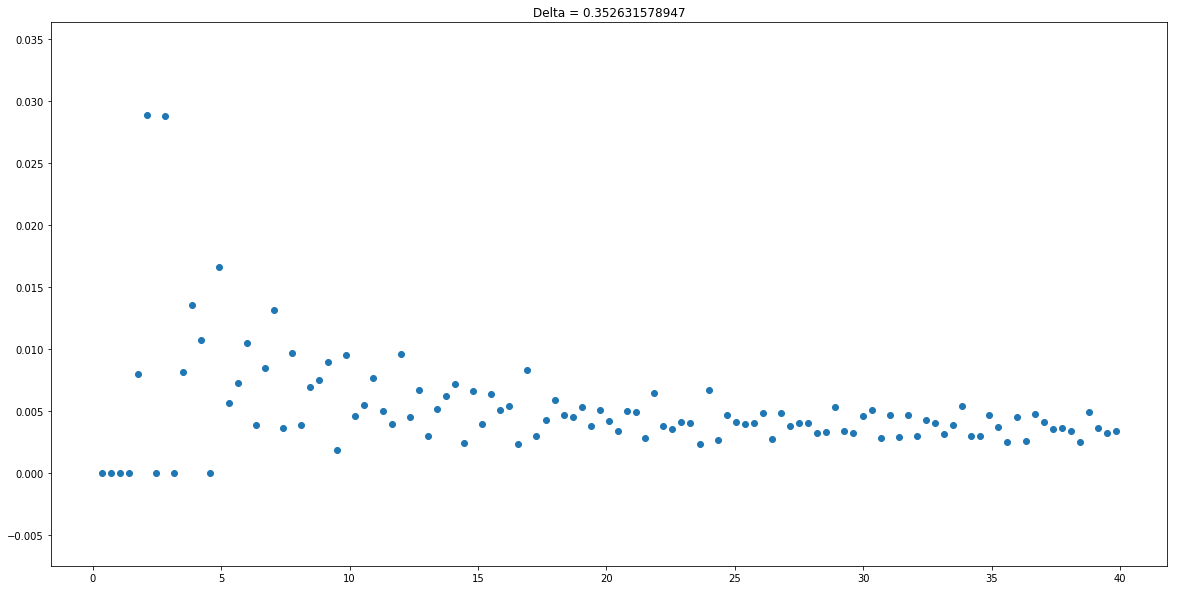

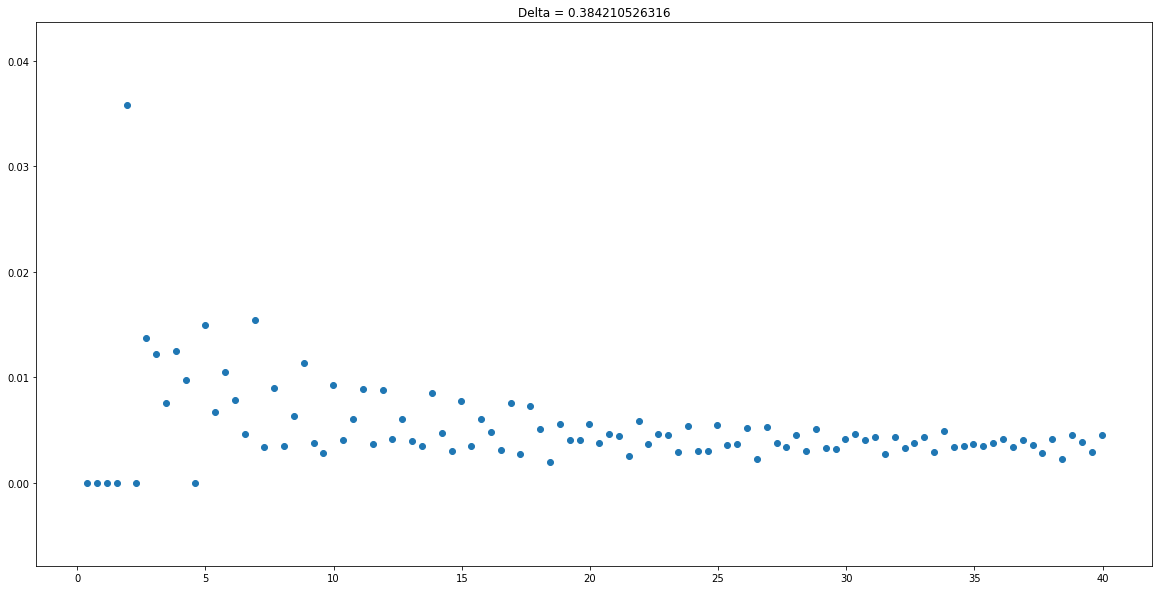

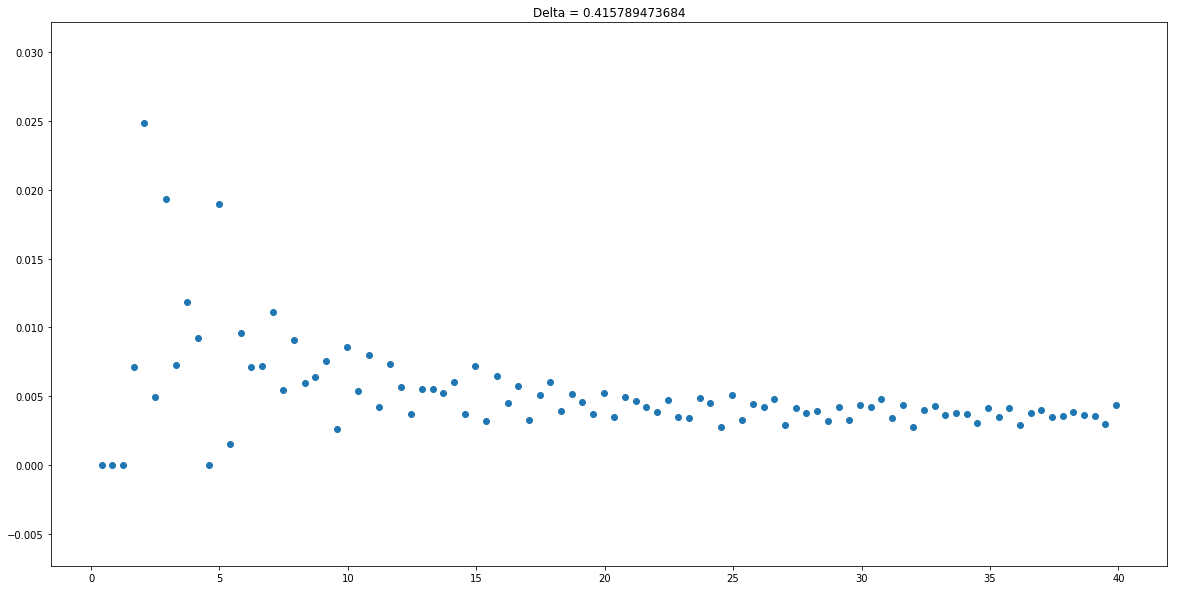

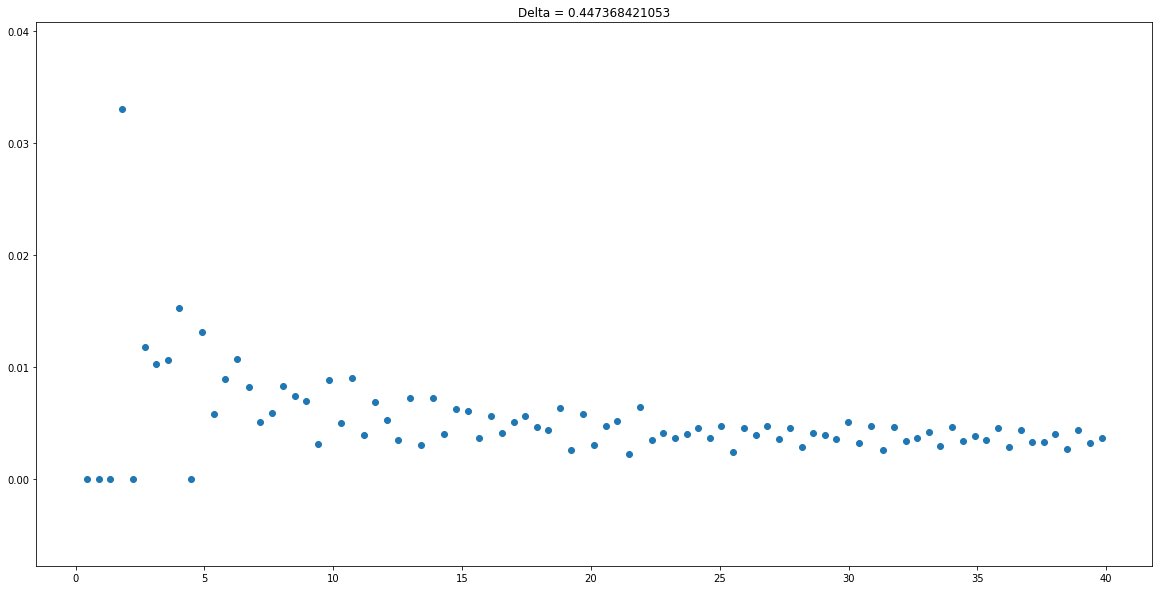

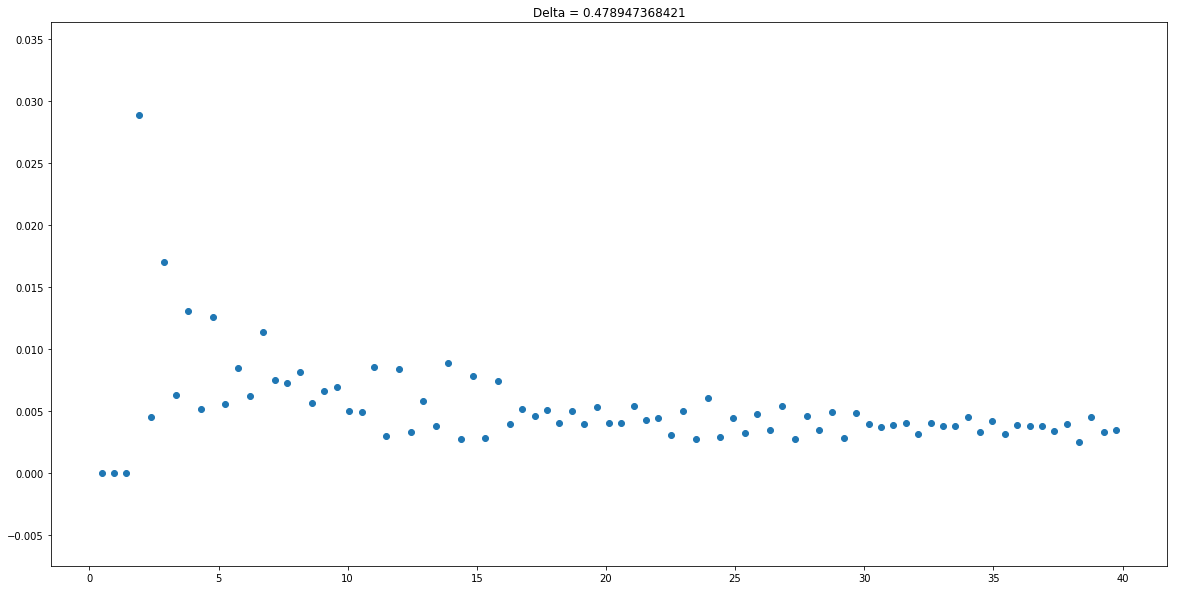

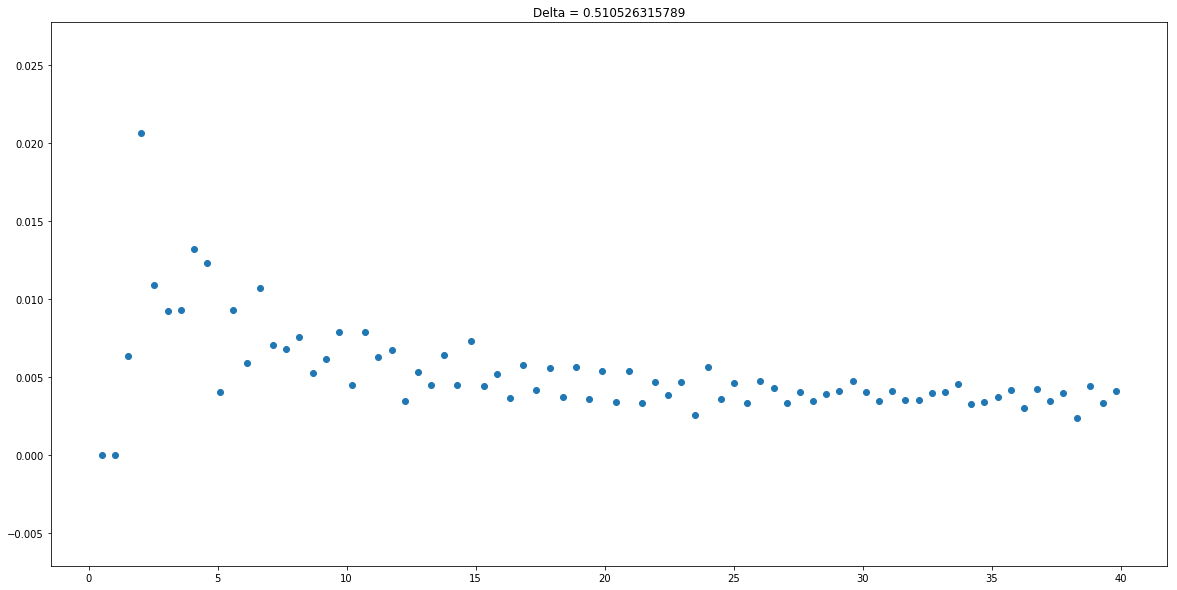

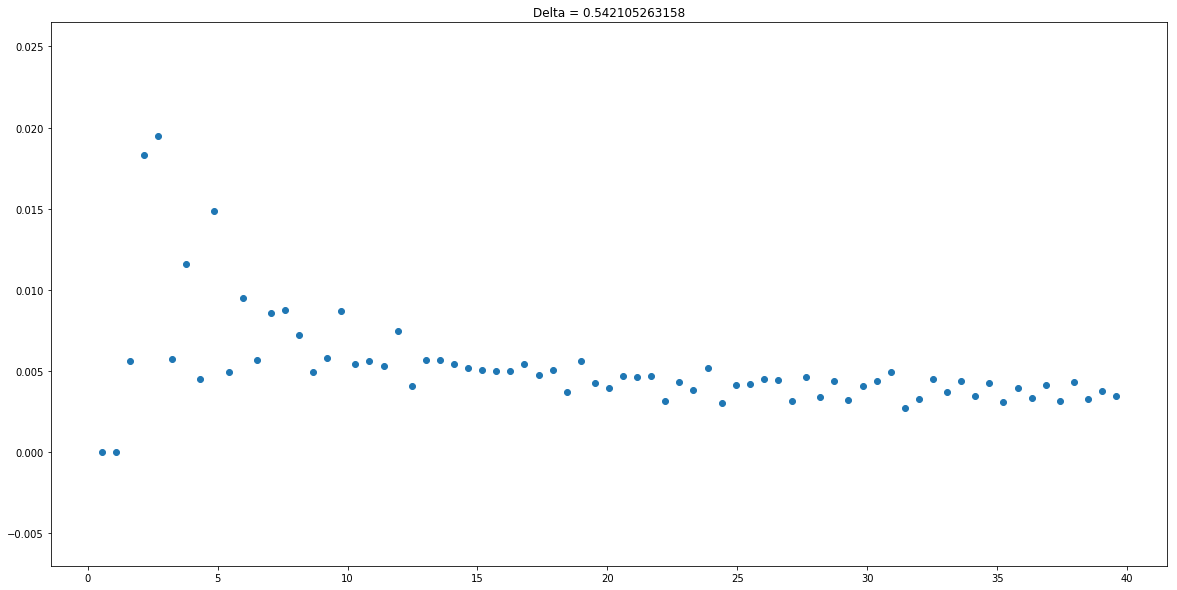

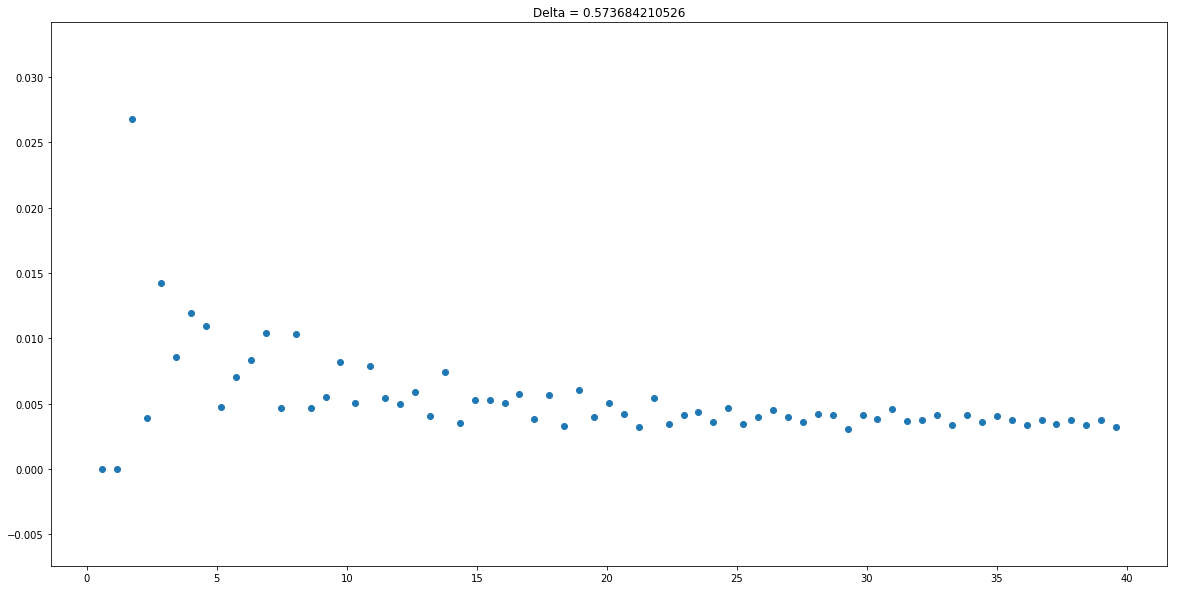

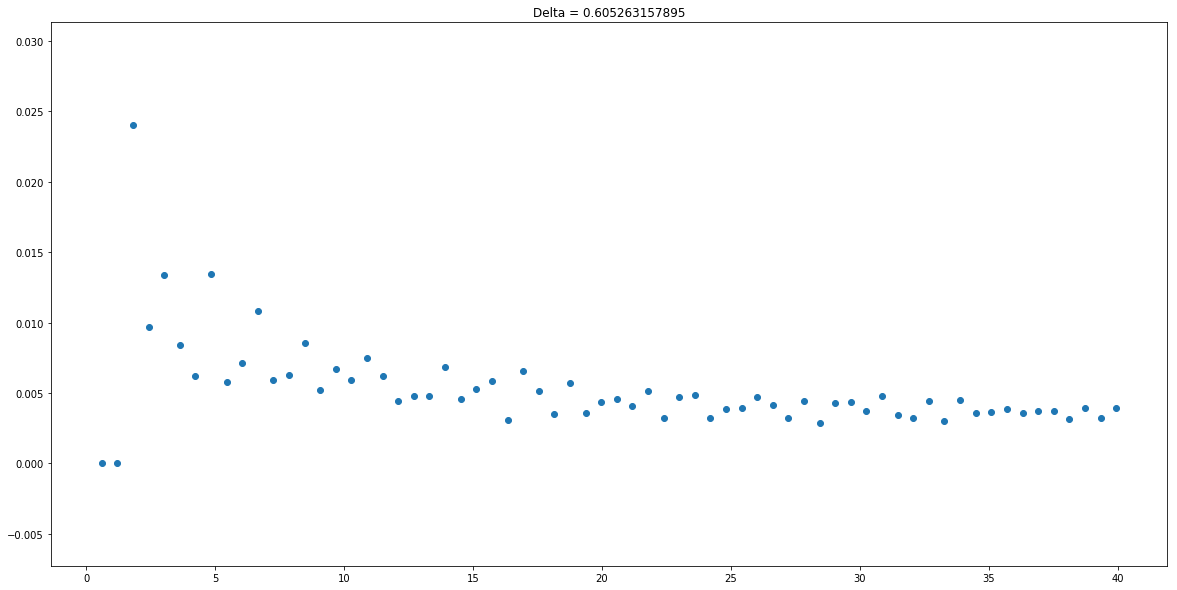

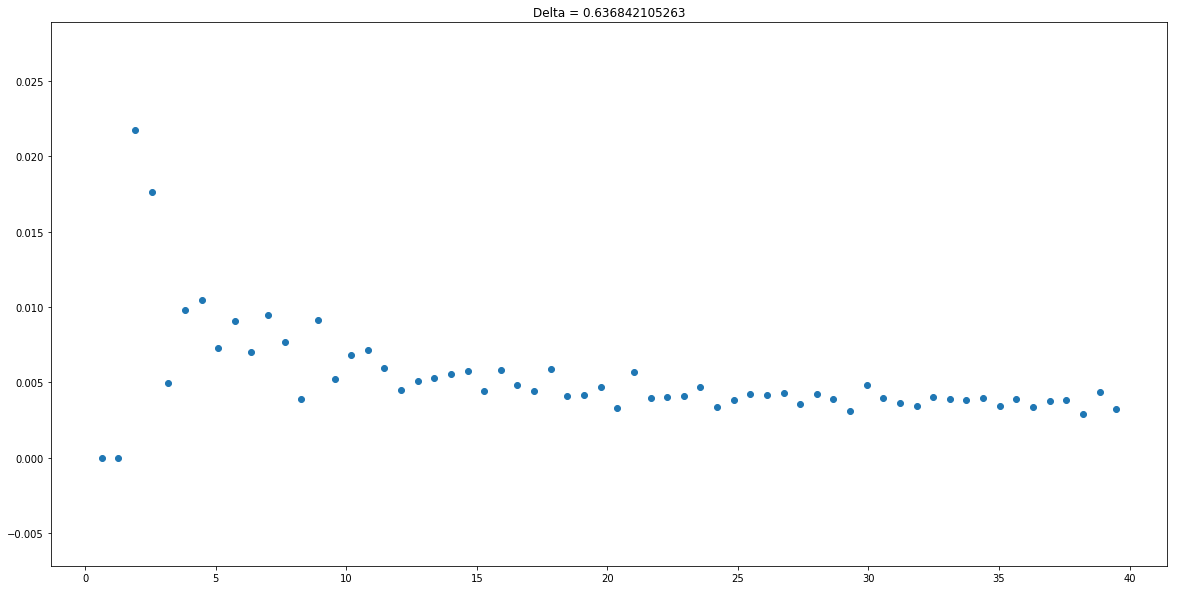

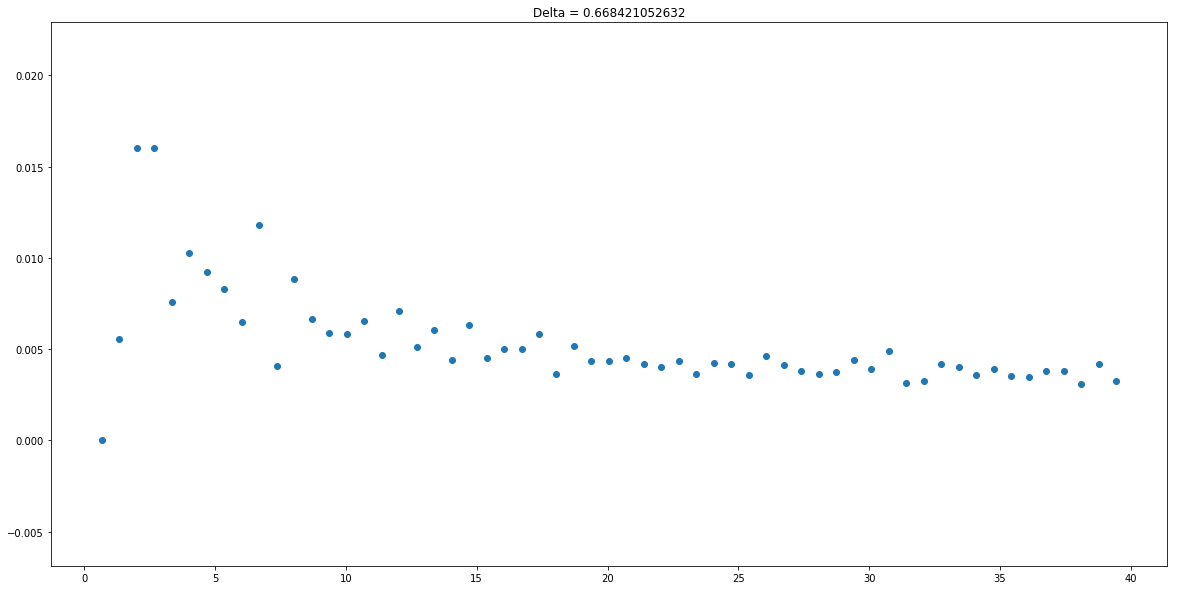

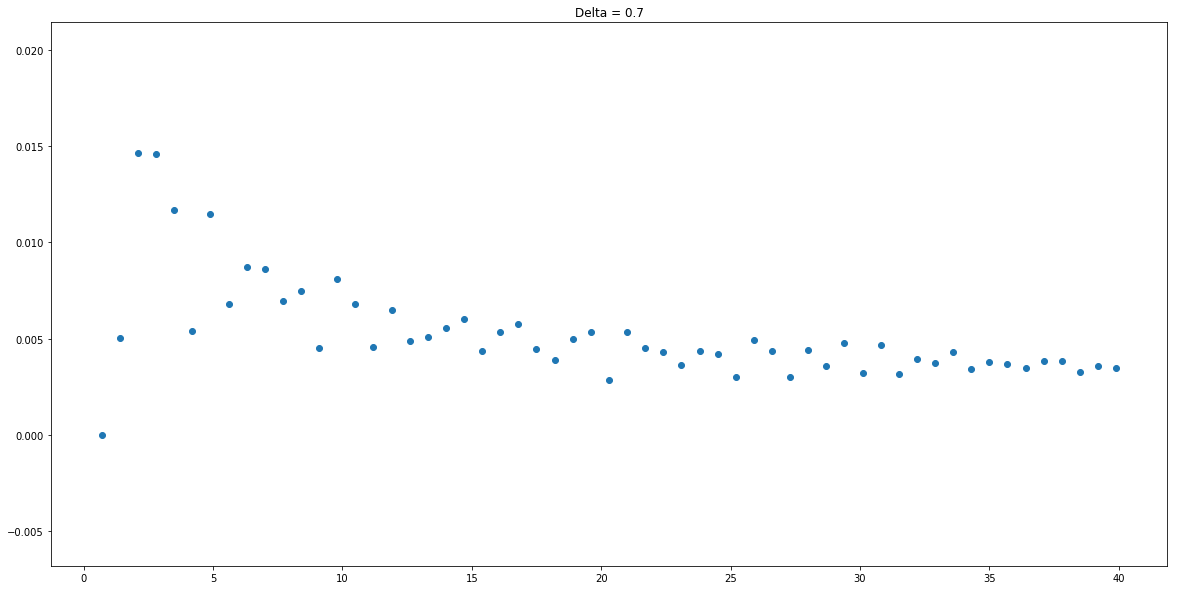

In [74]:

for i,j in enumerate(rho):
    plt.figure(figsize=(20,10))
    plt.title("Delta = "+str(delt[i]))
    plt.scatter(r[i],rho[i])
    plt.pause(0.05)
plt.show()

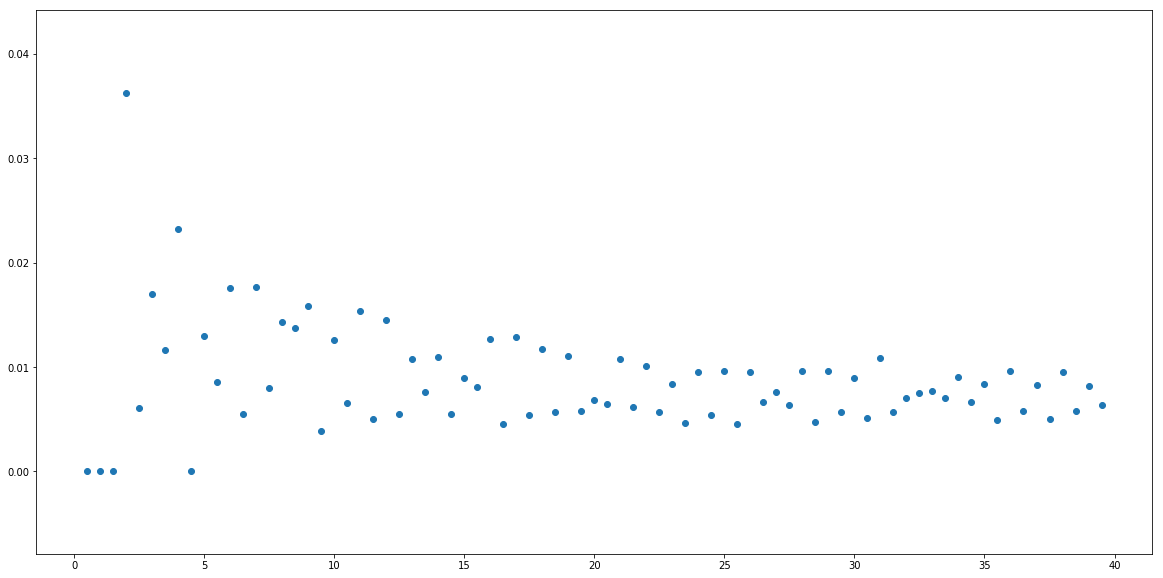

In [56]:
plt.figure(figsize=(20,10))
plt.scatter(r,rho)
plt.show()

In [70]:
data=np.load('Gory_Doliny/peaks.npy')

In [10]:
data.shape

(1481, 2)

In [20]:
for i in data[0:10,:]:
    a=ObliczDlugosc(i, data[0:10,:])
    print(a)

[0.0, 56.080299571239813, 25.179356624028344, 76.922038454528746, 37.643060449437421, 80.062475604992386, 66.272166103123567, 93.005376188691372, 117.72000679578642, 182.84966502567076]
[56.080299571239813, 0.0, 31.0, 25.45584412271571, 55.803225713214822, 37.161808352124091, 80.430093870391573, 72.006944109578768, 61.814237842102365, 129.07749610214788]
[25.179356624028344, 31.0, 0.0, 52.201532544552748, 35.846896657869841, 57.201398584300364, 65.80273550544841, 78.0, 92.541882410074194, 158.11388300841898]
[76.922038454528746, 25.45584412271571, 52.201532544552748, 0.0, 64.76109943476871, 16.278820596099706, 81.541400527584756, 57.245087125446844, 43.737855457258078, 105.94810050208545]
[37.643060449437421, 55.803225713214822, 35.846896657869841, 64.76109943476871, 0.0, 60.00833275470999, 30.413812651491099, 58.796258384356399, 108.46658471621571, 164.87874332369228]
[80.062475604992386, 37.161808352124091, 57.201398584300364, 16.278820596099706, 60.00833275470999, 0.0, 71.1758385970